In [37]:
from datasets import load_from_disk, concatenate_datasets

import glob
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dataset_fn_prefix = "soft-skills-v2-cls"

In [14]:
all_ds = []
for fn in glob.glob(dataset_fn_prefix + "*"):
    all_ds.append(load_from_disk(fn))

In [16]:
merged_ds = concatenate_datasets(all_ds)

In [17]:
merged_ds

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score', 'justification', 'classification_score', 'justification-v2', 'classification_score_v2'],
    num_rows: 1000000
})

In [46]:
#merged_ds.push_to_hub('amang1802/wildeweb_cls_1M_v2')

Uploading the dataset shards:   0%|          | 0/13 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/77 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/amang1802/wildeweb_cls_1M_v2/commit/c76c58ae758024566335242efd0c4bb056b6f2e0', commit_message='Upload dataset', commit_description='', oid='c76c58ae758024566335242efd0c4bb056b6f2e0', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/amang1802/wildeweb_cls_1M_v2', endpoint='https://huggingface.co', repo_type='dataset', repo_id='amang1802/wildeweb_cls_1M_v2'), pr_revision=None, pr_num=None)

In [21]:
s1 = np.array(merged_ds['classification_score'], dtype=np.int32)

In [22]:
s2 = np.array(merged_ds['classification_score_v2'], dtype=np.int32)

In [34]:
bins=[0,1,2,3,4,5, 6]

In [40]:
h1 = np.histogram(s1, bins=bins)[0]
h2 = np.histogram(s2, bins=bins)[0]

In [41]:
h1,h2

(array([272941, 583676,  71438,  33667,  20140,  18138]),
 array([  1063, 844648, 120651,  30220,   3412,      6]))

In [27]:
np.corrcoef(s1, s2)

array([[1.        , 0.61970187],
       [0.61970187, 1.        ]])

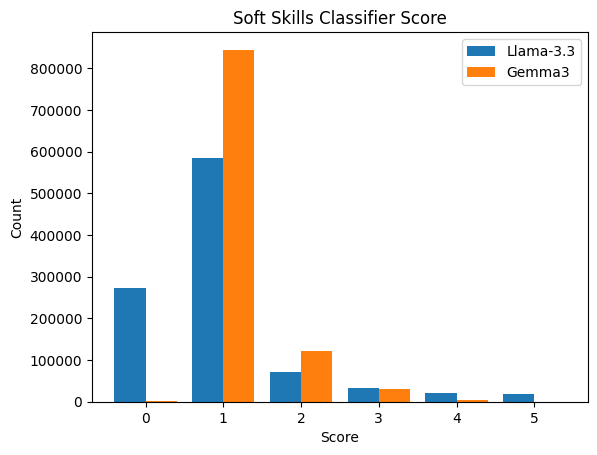

In [45]:
bar_width = 0.4
x = np.arange(len(h1))

plt.xlabel('Score')
plt.ylabel('Count')

plt.title('Soft Skills Classifier Score')
plt.bar(x - bar_width/2, h1, width=bar_width, label='Llama-3.3')
plt.bar(x + bar_width/2, h2, width=bar_width, label='Gemma3')
plt.legend()
plt.show()

In [61]:
merged_ds.filter(lambda row: row['classification_score_v2'] == 4)

Filter:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score', 'justification', 'classification_score', 'justification-v2', 'classification_score_v2'],
    num_rows: 3412
})

In [62]:
best_rows = _

In [73]:
print(best_rows[5]['text'])

Authors born between 1700 and 1800 CE
Click Up For A Summary Of Each Author
Women and Reason
Independence for Women
Mistaken Notions of Beauty
The Vices of Civilization
Women’s Power over Themselves
Friendship with Men
Origins of Virtue
Women in the World
Preparation for Parenthood
Education of Women
Mary Wollstonecraft (1759-1797), also known by her married name of Godwin Wollstonecraft, was born in Hoxton, England. Her father was an unsuccessful businessman and farmer who dissipated the money he inherited. She and her three sisters had little opportunity for education or for work to support themselves when they became of age. Mary Wollstonecraft initially lived with a friend and helped pay for her keep by taking in needlework. She and her sisters subsequently opened a school, which operated for about two years. By about this time, Wollstonecraft had begun to read widely and had became largely self-educated.
After the school closed, Wollstonecraft became governess to the children of L

In [74]:
best_rows[5]

{'text': 'Authors born between 1700 and 1800 CE\nClick Up For A Summary Of Each Author\nWomen and Reason\nIndependence for Women\nMistaken Notions of Beauty\nThe Vices of Civilization\nWomen’s Power over Themselves\nFriendship with Men\nOrigins of Virtue\nWomen in the World\nPreparation for Parenthood\nEducation of Women\nMary Wollstonecraft (1759-1797), also known by her married name of Godwin Wollstonecraft, was born in Hoxton, England. Her father was an unsuccessful businessman and farmer who dissipated the money he inherited. She and her three sisters had little opportunity for education or for work to support themselves when they became of age. Mary Wollstonecraft initially lived with a friend and helped pay for her keep by taking in needlework. She and her sisters subsequently opened a school, which operated for about two years. By about this time, Wollstonecraft had begun to read widely and had became largely self-educated.\nAfter the school closed, Wollstonecraft became governe